 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import libraries</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.utils import to_categorical
import warnings

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Settings</p>

In [ ]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 1000
# pd.options.display.precision = 5
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
img_rows, img_cols = 28, 28
num_classes = 10

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">Import data files</p>

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">I.DATA PREPARATION</p>

In [4]:
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(28000, 784)

In [9]:
train[['label']]

,label
0,1
1,0
2,1
3,4
4,0
...,...
41995,0
41996,1
41997,7
41998,6


In [10]:
# y = train[['label']]
y = train.loc[:,['label']]

In [12]:
X = train.drop(['label'], axis=1).copy()

In [13]:
X.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


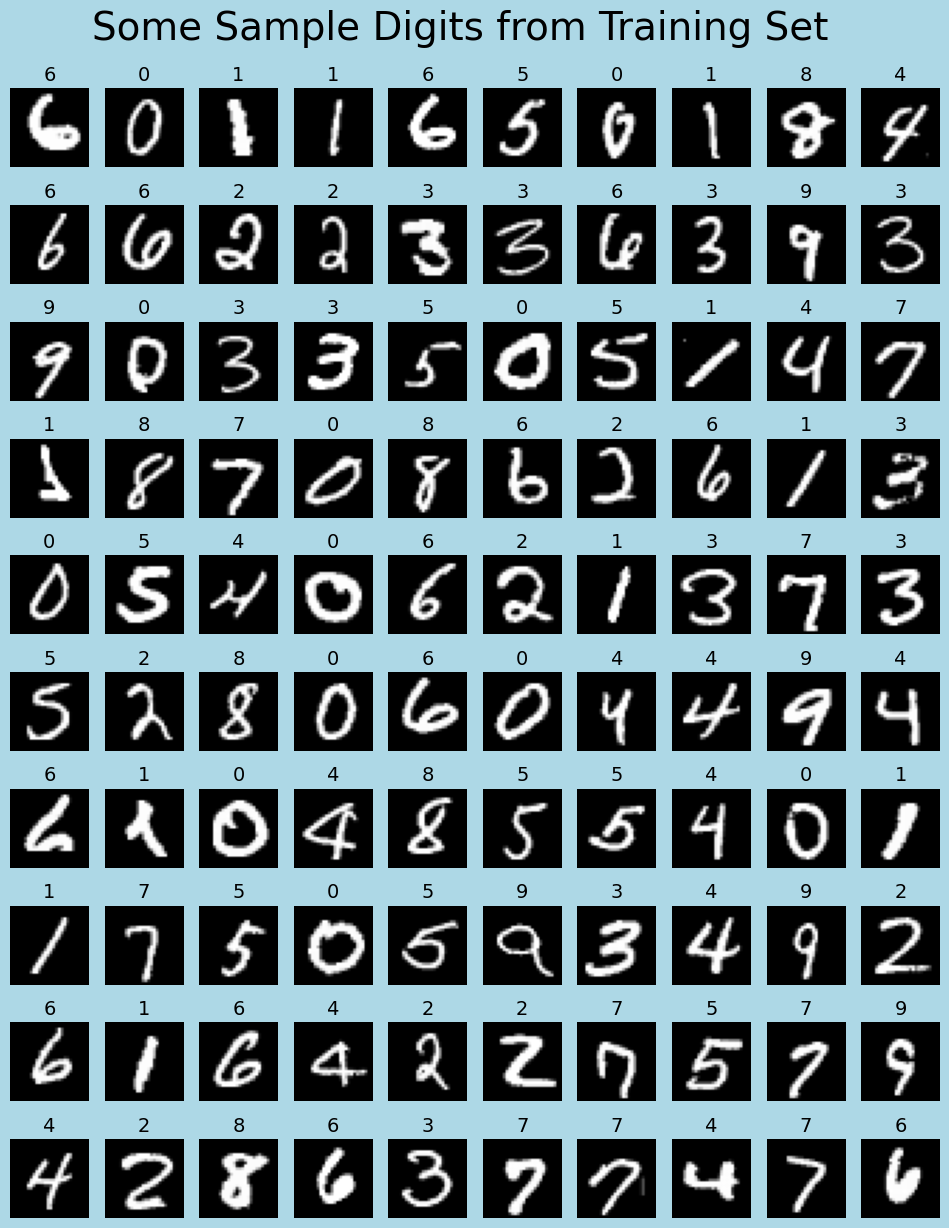

In [44]:
# POglądowy PLT + TESTY
# Set number of rows, columns.
N = 28

# Randomly choose 100 rows to display
row_list = random.sample(range(784), 100)

# Display row values as images
fig = plt.figure(figsize=(12, 14))

fig.patch.set_facecolor("lightblue")
fig.suptitle("Some Sample Digits from Training Set", fontsize=28)
fig.subplots_adjust(top=0.93)

for i, row in enumerate(row_list):
    pic = train.drop(columns="label").iloc[row].values
    pic = pic.reshape((N, N))
    label = train.iloc[row]["label"]
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(pic, cmap="gray")
    ax.set_title(label, fontsize=14, fontweight="normal")
    ax.axis("off")
plt.show()

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">NORMALIZATION</p>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Performing gray scale normallization to reduce the effect of illumination's difference.

In [14]:
# Normalize pixel values to be between 0 and 1
X=X/255.0
test=test/255.0

 #### <p style="background-color: #EDE7F6;color:#6600ff;display: inline-block;padding:.6rem;border-radius:.5rem">RESHAPING</p>

Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.

In [15]:
X1=X.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [16]:
X1.shape

(42000, 28, 28, 1)

Encode labels to one hot vector

eg:- [0,0,0,0,0,1,0,0,0,0]=number(5)

In [18]:
y_train=to_categorical(y,num_classes=10)

In [21]:
y_train.shape

(42000, 10)

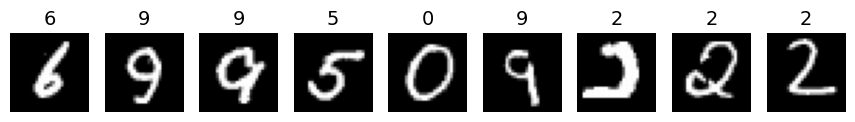

In [85]:
N = 28

# row_list = random.sample(range(784), 100)
fig = plt.figure(figsize=(12, 14))
row_list = random.sample(range(700), 9)

for i, row in enumerate(row_list):
    pic = train.drop(columns="label").iloc[row].values
    pic = pic.reshape((N, N))
    label = train.iloc[row]["label"]
    
    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(pic, cmap="gray")
    ax.set_title(label, fontsize=14, fontweight="normal")
    ax.axis("off")
plt.show()

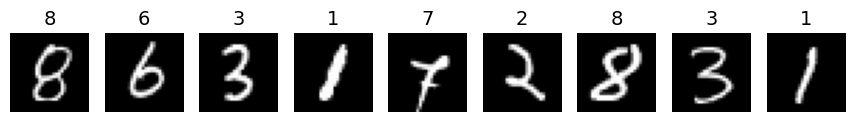

In [88]:
img_rows, img_cols = 28, 28
# Randomly choose 9 rows to display
row_list = random.sample(range(700), 9)
fig = plt.figure(figsize=(12, 14))


for i, row in enumerate(row_list):
#   pic = X.drop(columns="label").iloc[row].values
    pic = X.iloc[row].values
    pic = pic.reshape((img_rows, img_cols))
    label = y.iloc[row]["label"]

    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(pic, cmap="gray")
    ax.set_title(label, fontsize=14, fontweight="normal")
    ax.axis("off")
plt.show()

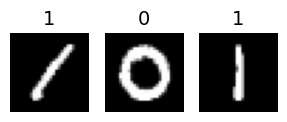

In [90]:
fig = plt.figure(figsize=(12, 14))

for i in range (3):
    pic = X.iloc[i].values
    pic = pic.reshape((img_rows, img_cols))
    label = y.iloc[i]["label"]

    ax = fig.add_subplot(10, 10, i + 1)
    ax.imshow(pic, cmap="gray")
    ax.set_title(label, fontsize=14, fontweight="normal")
    ax.axis("off")
plt.show()

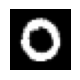

In [75]:
fig = plt.figure(figsize=(12, 14))

pic = X.iloc[1].values
pic = pic.reshape((img_rows, img_cols))
ax = fig.add_subplot(15, 10, i + 1)
ax.imshow(pic, cmap="gray")
ax.axis("off")
plt.show()

In [91]:
X.iloc[1].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [92]:
pic2 = train.drop(columns="label").iloc[row].values

In [94]:
pic3 = train.iloc[row].values

In [95]:
pic3

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        74, 248,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [159]:
X.iloc[[1],:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,...,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,p

In [134]:
row_list2 = random.sample(range(100), 100)

In [135]:
row_list2

[89,
 78,
 76,
 99,
 82,
 61,
 74,
 46,
 79,
 59,
 65,
 86,
 20,
 84,
 14,
 57,
 98,
 9,
 58,
 11,
 30,
 27,
 55,
 17,
 64,
 88,
 81,
 40,
 83,
 37,
 1,
 16,
 95,
 48,
 90,
 56,
 53,
 69,
 92,
 62,
 2,
 21,
 12,
 6,
 28,
 33,
 25,
 45,
 91,
 4,
 41,
 5,
 42,
 85,
 72,
 39,
 8,
 43,
 36,
 35,
 44,
 18,
 80,
 49,
 22,
 15,
 29,
 13,
 19,
 23,
 50,
 7,
 73,
 68,
 3,
 71,
 67,
 47,
 54,
 26,
 0,
 97,
 10,
 70,
 31,
 60,
 51,
 93,
 24,
 96,
 38,
 66,
 34,
 63,
 94,
 52,
 87,
 77,
 75,
 32]

In [12]:
# import tensorflow as tf
# from tensorflow.keras.utils import to_categorical
# img_rows, img_cols = 28, 28
# num_classes = 10

In [11]:
def data_prep(raw):
    out_y = to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [ ]:
# taki sam efekt ale inny zapis reshape
def data_prep_1(raw):
    out_y = to_categorical(raw.label, num_classes)
#     num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(-1, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [25]:
x1, y1 = data_prep_1(train)

In [ ]:
# to_categorical  =  to_dummies
# out = to_categorical(train.label, num_classes)
# out[0]

In [ ]:
# KONIEC TESTÓW

In [96]:
def data_prep(raw):
    out_y = to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [97]:
x, y = data_prep(train)

In [98]:
x.shape

(42000, 28, 28, 1)

In [99]:
x

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [100]:
# bez tego wywala błąd
from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

CNN Architecture
A common architecture for CNN is stack of Conv2D and Pooling2D followed by a few denesly connected layers.
-To idea is that the stack of convolutional and maxPooling layers extract the feature from image.
-Then these features are flattened.
-And fed to densly connected layers that determine the class of the image based on the presence of features (przekazywane do gęsto połączonych warstw, które określają klasę obrazu na podstawie obecności cech) 

### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">II.MODEL ENGINEERING</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A.Model Training</p>

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">A1.Model_1</p>

In [101]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 strides=2,
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Dropout(0.5))
model.add(Conv2D(28, kernel_size=(3, 3), strides=2, activation='relu'))
model.add(Dropout(0.5))
#Now we need to take these extracted features and add a way to classify them
model.add(Flatten())
# (spłaszczony wynik +1 biases) x 128 dodanych neuronów
# (1008+1)x128=129152
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [102]:
# Stop training when a monitored quantity has stopped improving.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [105]:
# loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss='binary_crossentropy',
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])


In [107]:
train_model = model.fit(x, y,
                      batch_size=128,
                      epochs=300,
                      validation_split = 0.2, verbose=1,
#                       callbacks=[early_stop]
                      )

Epoch 1/300
263/263 [==============================] - 2s 4ms/step - loss: 0.6565 - accuracy: 0.7968 - val_loss: 0.2230 - val_accuracy: 0.9370
Epoch 2/300
263/263 [==============================] - 1s 4ms/step - loss: 0.2794 - accuracy: 0.9142 - val_loss: 0.1340 - val_accuracy: 0.9595
Epoch 3/300
263/263 [==============================] - 1s 3ms/step - loss: 0.2019 - accuracy: 0.9379 - val_loss: 0.1023 - val_accuracy: 0.9664
Epoch 4/300
263/263 [==============================] - 1s 4ms/step - loss: 0.1676 - accuracy: 0.9471 - val_loss: 0.0795 - val_accuracy: 0.9739
Epoch 5/300
263/263 [==============================] - 1s 4ms/step - loss: 0.1442 - accuracy: 0.9549 - val_loss: 0.0700 - val_accuracy: 0.9787
Epoch 6/300
263/263 [==============================] - 1s 4ms/step - loss: 0.1288 - accuracy: 0.9582 - val_loss: 0.0654 - val_accuracy: 0.9782
Epoch 7/300
263/263 [==============================] - 1s 4ms/step - loss: 0.1184 - accuracy: 0.9635 - val_loss: 0.0641 - val_accuracy: 0.9787

KeyboardInterrupt: 

In [29]:
# 20
# strides=2,
# padding='same',
# [0.7919345498085022, 0.9075892567634583]

train_model.history['accuracy']

[0.7952380776405334,
 0.9086309671401978,
 0.9324702620506287,
 0.9454464316368103,
 0.9521130919456482,
 0.9569643139839172,
 0.9605357050895691,
 0.963660717010498,
 0.9674999713897705,
 0.9690476059913635,
 0.9713690280914307,
 0.9699404835700989,
 0.9727976322174072,
 0.9720237851142883,
 0.973809540271759,
 0.9752380847930908,
 0.9764285683631897,
 0.9774404764175415,
 0.979107141494751,
 0.9771726131439209,
 0.9785119295120239,
 0.979494035243988,
 0.9802976250648499,
 0.9810119271278381,
 0.9803571701049805,
 0.9798214435577393,
 0.9822916388511658,
 0.9832440614700317,
 0.9822618961334229,
 0.9819047451019287,
 0.9836309552192688,
 0.9830952286720276,
 0.983214259147644,
 0.9838988184928894,
 0.9844345450401306,
 0.9856547713279724,
 0.9842857122421265,
 0.9849404692649841,
 0.9855059385299683,
 0.9861606955528259,
 0.9858630895614624,
 0.9867261648178101,
 0.9854761958122253,
 0.9871726036071777,
 0.985535740852356,
 0.9864285588264465,
 0.9863095283508301,
 0.9869345426559448

In [30]:
train_model.history['val_accuracy']

[0.9346428513526917,
 0.9565476179122925,
 0.9654762148857117,
 0.970119059085846,
 0.9747619032859802,
 0.977738082408905,
 0.9785714149475098,
 0.9782142639160156,
 0.981071412563324,
 0.9833333492279053,
 0.9805952310562134,
 0.9820238351821899,
 0.9828571677207947,
 0.9835714101791382,
 0.9839285612106323,
 0.9857142567634583,
 0.9847618937492371,
 0.9860714077949524,
 0.9872618913650513,
 0.9853571653366089,
 0.9847618937492371,
 0.9847618937492371,
 0.9840475916862488,
 0.9851190447807312,
 0.9854761958122253,
 0.9846428632736206,
 0.9879761934280396,
 0.986547589302063,
 0.9846428632736206,
 0.9866666793823242,
 0.9873809814453125,
 0.9873809814453125,
 0.9872618913650513,
 0.9867857098579407,
 0.9858333468437195,
 0.9877380728721619,
 0.9878571629524231,
 0.9877380728721619,
 0.987500011920929,
 0.9870238304138184,
 0.9886904954910278,
 0.9869047403335571,
 0.987500011920929,
 0.9869047403335571,
 0.9873809814453125,
 0.9858333468437195,
 0.9864285588264465,
 0.987500011920929,

In [31]:
train_model.history['loss']

[0.658652126789093,
 0.29821300506591797,
 0.22020593285560608,
 0.1779857575893402,
 0.1537947952747345,
 0.13573944568634033,
 0.12292803078889847,
 0.1129373162984848,
 0.1034180223941803,
 0.09627997130155563,
 0.08984075486660004,
 0.09106883406639099,
 0.08433305472135544,
 0.08369836211204529,
 0.07886959612369537,
 0.07489588111639023,
 0.06961497664451599,
 0.06878884136676788,
 0.06444472074508667,
 0.06787420809268951,
 0.06446097791194916,
 0.062403853982686996,
 0.058481935411691666,
 0.05810223147273064,
 0.05743388459086418,
 0.055574506521224976,
 0.052639931440353394,
 0.05147259309887886,
 0.052300095558166504,
 0.053710997104644775,
 0.04955214262008667,
 0.04972655326128006,
 0.047467488795518875,
 0.049668680876493454,
 0.04694587364792824,
 0.04492964223027229,
 0.048119883984327316,
 0.044366415590047836,
 0.04252120107412338,
 0.04092266038060188,
 0.04165848344564438,
 0.04079370200634003,
 0.04211860150098801,
 0.039640020579099655,
 0.040671415627002716,
 0.0

In [32]:
train_model.history['val_loss']

[0.23042725026607513,
 0.1514502316713333,
 0.11211947351694107,
 0.09443136304616928,
 0.08130434900522232,
 0.07211819291114807,
 0.06859368830919266,
 0.06859766691923141,
 0.06047983467578888,
 0.05567476898431778,
 0.05705927684903145,
 0.05172606185078621,
 0.05390804633498192,
 0.05054570734500885,
 0.04923400655388832,
 0.04649306833744049,
 0.046436768025159836,
 0.04428768903017044,
 0.04426449537277222,
 0.04597451165318489,
 0.04733883589506149,
 0.04739265888929367,
 0.04600551351904869,
 0.04646982252597809,
 0.045240070670843124,
 0.043925561010837555,
 0.042294941842556,
 0.045062653720378876,
 0.05039506405591965,
 0.043834611773490906,
 0.043705251067876816,
 0.04268884286284447,
 0.04083741083741188,
 0.039523959159851074,
 0.044735848903656006,
 0.04050234332680702,
 0.04128803312778473,
 0.04180944710969925,
 0.04233330860733986,
 0.043771155178546906,
 0.03896830976009369,
 0.04175780341029167,
 0.04153146594762802,
 0.04156113788485527,
 0.04508792236447334,
 0.0

<Axes: >

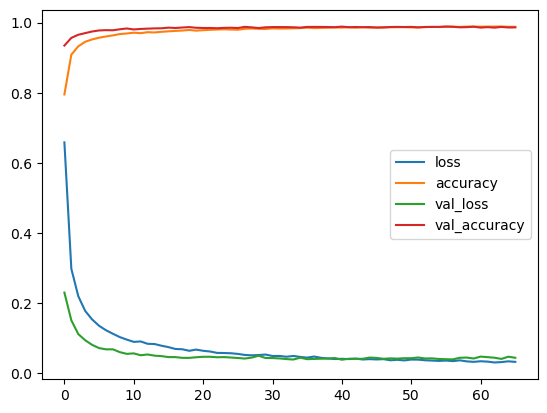

In [34]:
model_loss = pd.DataFrame(train_model.history)
model_loss.plot()

In [36]:
import matplotlib.pyplot as plt
# import seaborn as sns

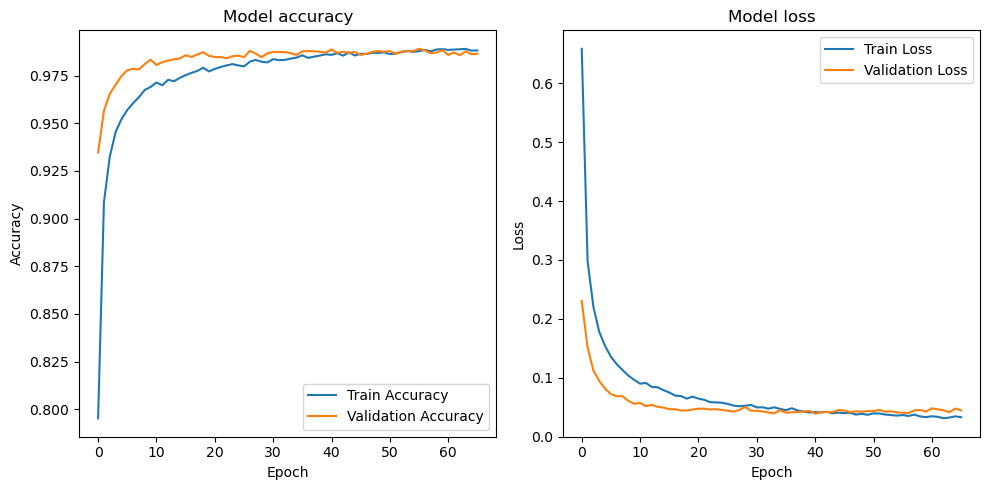

In [38]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_model.history['accuracy'], label='Train Accuracy')
plt.plot(train_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_model.history['loss'], label='Train Loss')
plt.plot(train_model.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### <p style="background-color: #EDE7F6; color: #6600ff;margin:0; display:inline-block;padding:.6rem;border-radius:.25rem;">Model Evaluation</p>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

In [ ]:
test_labels = model.predict(test_features)
test_labels = (test_labels > 0.5).astype(int).flatten()

In [ ]:
predictions = (model.predict(X_test) > 0.5)*1

Each neuron in one layer is connected to every neuron in the next layer. This is called a dense layer. There are many other ways of connecting layers but well discuss those as we see them


Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True ).

Weights
Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network is trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

Biases
Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire activation function by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

output shape
28 - rozmiar w pixelach(robimy zawsze żeby był kwadrat 28x28 a nie 28x30)
3  - kernel_size=(3, 3)
0  - padding "valid"
2  - stride of (2, 2), default=2


( (28 - 3 + 2 * 0)/2 + 1)

25/2 +1 = 13

Param
ReLU = 10 x 10
20@10 x 10   
- filters=20

Param
((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters).
((m * n * d)+1)* k)
((3*3*-)+1)*20=200
((3*3*20)+1)*28=5068


In [24]:
# 66%
# conv2d_5 (Conv2D) 
# padding='same'
# stride=2
# ( (28 - 3 + 2 * 1)/2 + 1)
# (25+2)/2 +1 = 13+1=14

# conv2d_6 (Conv2D)
# padding="valid" - domyślnie bo nie został podany
# stride=2
# ( (14 - 3 + 2 * 0)/2 + 1)
# (11+0)/2 +1 = 5+1=6
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 20)        200       
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 28)          5068      
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1008)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               129152    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [22]:
# 40%
# padding='same'
# ( (28 - 3 + 2 * 1)/1 + 1)
# (25+2)/1 +1 = 28
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 28)        5068      
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               605824    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [18]:
# 44%
# default stride = 1
# ( (28 - 3 + 2 * 0)/1 + 1)
# 25/1 +1 = 26
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 20)        200       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 28)        5068      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4032)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               516224    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [56]:
# 62%
# stride=2
# ( (28 - 3 + 2 * 0)/2 + 1)
# 25/2 +1 = 13
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 13, 13, 20)        200       
_________________________________________________________________
dropout_18 (Dropout)         (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 28)          5068      
_________________________________________________________________
dropout_19 (Dropout)         (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1008)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               129152    
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

Input 1289x128
filters=24
kernel_size=(8, 8)
stride=2
The model summary is given the figure at the end of my question. The input layer takes RGB images with width = 128 and height = 128. The first conv2D layer tells me the output dimension is (None, 61, 61, 24). I have used the kernel size of (8, 8), a stride of (2, 2) no padding. The values 61 = floor( (128 - 8 + 2 * 0)/2 + 1) and 24 (number of kernels/filters) makes sense. 
(None, 61, 61, 24)

Pooling -Ich zadaniem jest zmniejszenie wymiarów przestrzennych danych wejściowych (szerokości i wysokości), przy jednoczesnym zachowaniu najważniejszych informacji.
MaxPooling((2,2))  - sample2x2 and a stride of 2

W sieciach neuronowych splotowych (CNN) warstwa pulowania jest powszechnym typem warstwy, która jest zwykle dodawana po warstwach splotowych. Warstwa pulowania jest używana do redukcji wymiarów przestrzennych (tj. szerokości i wysokości) map cech, przy jednoczesnym zachowaniu głębokości (tj. liczby kanałów)

keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, name=None, **kwargs
)

Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window 
(of size defined by pool_size) 
for each channel of the input. The window is shifted by strides along each dimension.

The resulting output when using the "valid" padding option has a spatial shape (number of rows or columns) of: 
output_shape = math.floor((input_shape - pool_size) / strides) + 1 
(when input_shape >= pool_size)

The resulting output shape when using the "same" padding option is: output_shape = math.floor((input_shape - 1) / strides) + 1

Padding- jezeli chcemy miec taski sam rozmiar filtra po conv2D to dodajemy dodatkowy pixel dookoła obrazka. Dzięki temu możemy wychwycić pattern, który jest na krawędzi obrazka. Może być max      , min , avg.
np 5x5 -> conv layer = 3x3
gdzy dodamy padding
5x5->7x7-conv2D = 5x5

Default
padding='valid',  - czyli brak

Stride - to jest przesunięcie - o ile pixeli przesunąć zastosowany następny filtr. Im większe to przesunięcie to mniejsza będzie wyjściowa wielkość filtra (output feature map). Dlatego można np. dodać większy padding.
Default = 2